# Box 5.1: Worked example: crab and burrow density on Christmas Island
Green (1997) studied the ecology of red land crabs on Christmas Island and examined the relationship between the total biomass of red land crabs and the density of their burrows within 25m^2 quadrats (sampling units) at ﬁve forested sites on the island. We will look at two of these sites.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms

### Load data

In [2]:
df = pd.read_csv('../../data/chpt5/green.csv')

In [3]:
df.head()

,SITE,QUADNUM,TOTMASS,BURROWS
0,DS,1,2.15,39
1,DS,2,2.27,38
2,DS,3,4.31,61
3,DS,4,2.58,79
4,DS,5,3.23,35


In [4]:
df = df.drop('QUADNUM',axis=1)

In [5]:
df.groupby('SITE').mean()

,TOTMASS,BURROWS
SITE,,
DS,2.48875,45.5
LS,3.79700,32.6


### Plots

(0, 5)

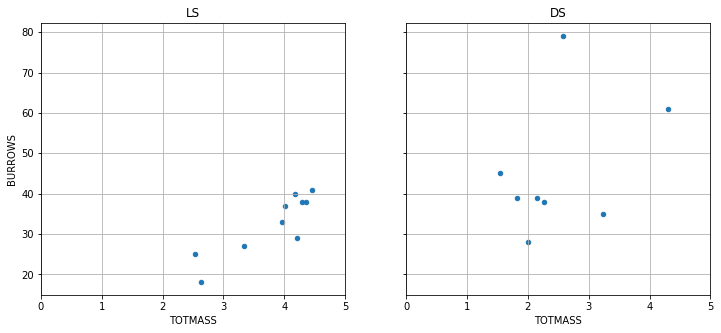

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5), sharex=True, sharey=True )
df[df.SITE=='LS'].plot(kind='scatter',x='TOTMASS', y='BURROWS',grid=True,ax=ax[0], title='LS')
df[df.SITE=='DS'].plot(kind='scatter',x='TOTMASS', y='BURROWS',grid=True,ax=ax[1], title='DS')
ax[0].set_xlim([0,5])

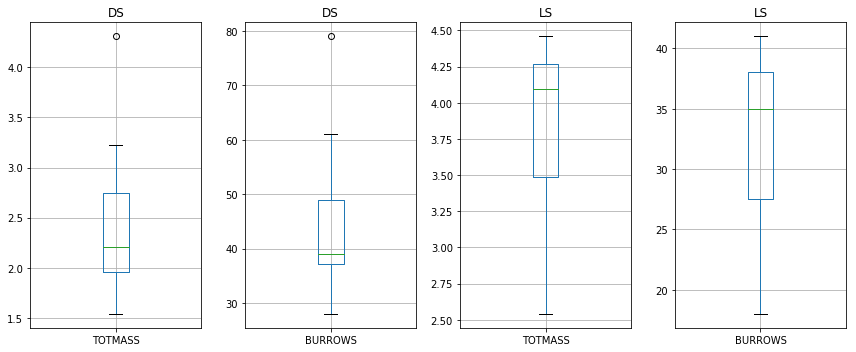

In [26]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,5))
df[df.SITE=='DS']['TOTMASS'].plot(kind='box',grid=True,ax=ax[0], title='DS')
df[df.SITE=='DS']['BURROWS'].plot(kind='box',grid=True,ax=ax[1], title='DS')
df[df.SITE=='LS']['TOTMASS'].plot(kind='box',grid=True,ax=ax[2], title='LS')
df[df.SITE=='LS']['BURROWS'].plot(kind='box',grid=True,ax=ax[3], title='LS')
fig.tight_layout()

### Correlation

In [27]:
df.groupby('SITE').corr(method='pearson')

BURROWS   TOTMASS
SITE                            
DS   BURROWS  1.000000  0.391716
     TOTMASS  0.391716  1.000000
LS   BURROWS  1.000000  0.881955
     TOTMASS  0.881955  1.000000

In [41]:
ds = df[df.SITE=='DS']
ls = df[df.SITE=='LS']
pearson_stat, pearson_p = stats.pearsonr(ds['BURROWS'],ds['TOTMASS'])
spearman_stat, spearman_p = stats.spearmanr(ds['BURROWS'],ds['TOTMASS'])
kendall_stat, kendall_p = stats.kendalltau(ds['BURROWS'],ds['TOTMASS'])
print('Correlation type: \t Statistics: \t P value:')
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Pearson', pearson_stat, pearson_p))
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Spearman', spearman_stat, spearman_p))
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Kendall', kendall_stat, kendall_p))

Correlation type: 	 Statistics: 	 P value:
Pearson 		 0.392 		 0.337
Spearman 		 0.168 		 0.691
Kendall 		 0.036 		 0.901


In [43]:
ls = df[df.SITE=='LS']
pearson_stat, pearson_p = stats.pearsonr(ls['BURROWS'],ls['TOTMASS'])
spearman_stat, spearman_p = stats.spearmanr(ls['BURROWS'],ls['TOTMASS'])
kendall_stat, kendall_p = stats.kendalltau(ls['BURROWS'],ls['TOTMASS'])
print('Correlation type \t Statistics \t P value')
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Pearson', pearson_stat, pearson_p))
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Spearman', spearman_stat, spearman_p))
print('{} \t\t {:.3f} \t\t {:.3f}'.format('Kendall', kendall_stat, kendall_p))

Correlation type 	 Statistics 	 P value
Pearson 		 0.882 		 0.001
Spearman 		 0.851 		 0.002
Kendall 		 0.719 		 0.004
